In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("bike_share_dataset.csv")

In [6]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [7]:
df.columns = df.columns.str.lower()

In [8]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [9]:
# Extract various time-related features rom the timestamp column
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month
df['year'] = df['timestamp'].dt.year
df['weekday'] = df['timestamp'].dt.weekday

In [10]:
df.drop(columns=['timestamp'], inplace=True)

### EDA

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
 9   hour          17414 non-null  int32  
 10  day           17414 non-null  int32  
 11  month         17414 non-null  int32  
 12  year          17414 non-null  int32  
 13  weekday       17414 non-null  int32  
dtypes: float64(8), int32(5), int64(1)
memory usage: 1.5 MB
None


In [12]:
df.isnull().sum()

cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
hour            0
day             0
month           0
year            0
weekday         0
dtype: int64

In [13]:
df.nunique()

cnt             3781
t1                73
t2                82
hum              143
wind_speed       103
weather_code       7
is_holiday         2
is_weekend         2
season             4
hour              24
day               31
month             12
year               3
weekday            7
dtype: int64

In [14]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day,month,year,weekday
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,4,1,2015,6
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,1,2015,6
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,4,1,2015,6
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,4,1,2015,6
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,4,1,2015,6


In [15]:
# Map categorical values
holiday_mapping = {0: "non-holiday", 1: "holiday"}
df['is_holiday'] = df['is_holiday'].map(holiday_mapping)

In [16]:
weekend_mapping = {0: "weekday", 1: "weekend"}
df['is_weekend'] = df['is_weekend'].map(weekend_mapping)

In [17]:
season_mapping = {
    0: "spring",
    1: "summer",
    2: "fall",
    3: "winter"
}
df['season'] = df['season'].map(season_mapping)

In [18]:
df['weather_code'].unique()

array([ 3.,  1.,  4.,  7.,  2., 26., 10.])

In [19]:
weather_code_mapping = {
    1: "mostly_clear",
    2: "few_clouds",
    3: "broken_clouds",
    4: "cloudy",
    7: "light_rain",
    10: "thunderstorm",
    26: "snowfall"
}

df['weather_code'] = df['weather_code'].map(weather_code_mapping)

In [20]:
weekday_mapping = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday"
}

df['weekday'] = df['weekday'].map(weekday_mapping)

In [21]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day,month,year,weekday
0,182,3.0,2.0,93.0,6.0,broken_clouds,non-holiday,weekend,winter,0,4,1,2015,Sunday
1,138,3.0,2.5,93.0,5.0,mostly_clear,non-holiday,weekend,winter,1,4,1,2015,Sunday
2,134,2.5,2.5,96.5,0.0,mostly_clear,non-holiday,weekend,winter,2,4,1,2015,Sunday
3,72,2.0,2.0,100.0,0.0,mostly_clear,non-holiday,weekend,winter,3,4,1,2015,Sunday
4,47,2.0,0.0,93.0,6.5,mostly_clear,non-holiday,weekend,winter,4,4,1,2015,Sunday


In [22]:
df.dtypes

cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code     object
is_holiday       object
is_weekend       object
season           object
hour              int32
day               int32
month             int32
year              int32
weekday          object
dtype: object

In [23]:
numerical = ['cnt', 't1', 't2', 'hum', 'wind_speed']

<Axes: xlabel='cnt', ylabel='Count'>

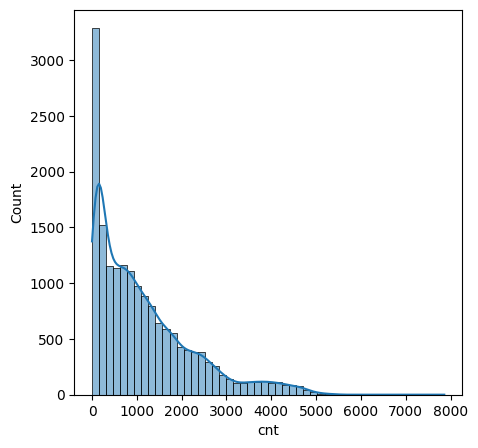

In [24]:
plt.figure(figsize=(5, 5))
sns.histplot(df['cnt'], bins=50, kde=True)


In [25]:
categorical = ['weather_code', 'is_holiday', 'is_weekend', 'season', 'month', 'weekday', 'year', 'hour']
numerical = ['t1', 't2', 'hum', 'wind_speed', 'day']

In [26]:
# Calculating mutual information scores between categorical features and the target variable
from sklearn.metrics import mutual_info_score
def mutual_info_diag_score(series):
    return mutual_info_score(series, df.cnt)

mi = df[categorical].apply(mutual_info_diag_score)
mi

mi.sort_values(ascending = False)

hour            1.794121
month           0.979436
weekday         0.665965
weather_code    0.467270
season          0.382495
is_weekend      0.157806
year            0.153299
is_holiday      0.042872
dtype: float64

'hour', 'month', and 'weekday' features have a strong influence on predicting 'cnt', while features like 'is_holiday' and 'year' appear to contribute less to the model

In [27]:
#analyze the correlation between numerical features and the target variable 'cnt'
df[numerical].corrwith(df.cnt)

t1            0.388798
t2            0.369035
hum          -0.462901
wind_speed    0.116295
day          -0.017887
dtype: float64

In [28]:
correlation_matrix = df[numerical].corr()
print(correlation_matrix)

                  t1        t2       hum  wind_speed       day
t1          1.000000  0.988344 -0.447781    0.145471  0.005072
t2          0.988344  1.000000 -0.403495    0.088409  0.006791
hum        -0.447781 -0.403495  1.000000   -0.287789 -0.020868
wind_speed  0.145471  0.088409 -0.287789    1.000000  0.002040
day         0.005072  0.006791 -0.020868    0.002040  1.000000


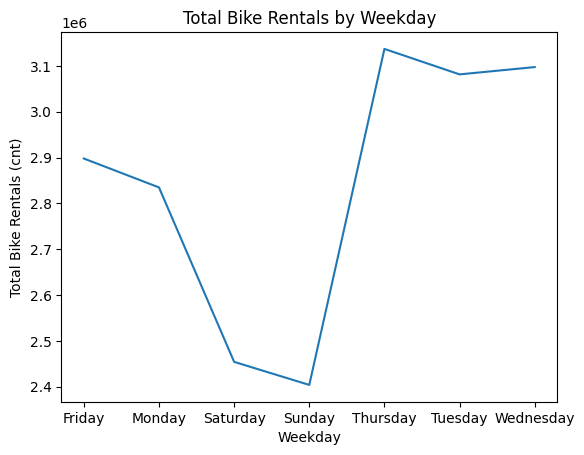

In [29]:
weekday_sum = df.groupby('weekday')['cnt'].sum()

plt.plot(weekday_sum.index, weekday_sum.values)
plt.xlabel('Weekday')
plt.ylabel('Total Bike Rentals (cnt)')
plt.title('Total Bike Rentals by Weekday')
plt.show()

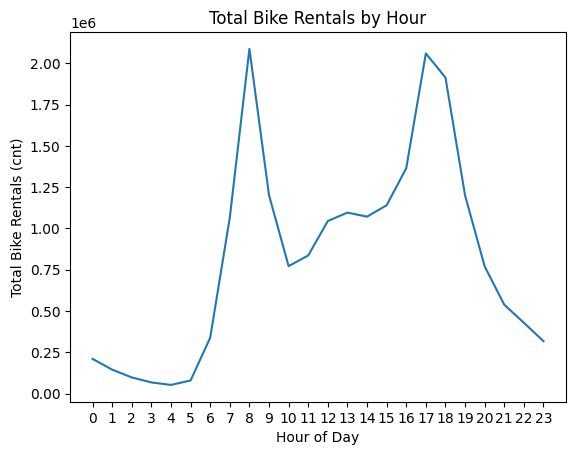

In [30]:
hour_sum = df.groupby('hour')['cnt'].sum()

plt.plot(hour_sum.index, hour_sum.values)
plt.xlabel('Hour of Day')
plt.ylabel('Total Bike Rentals (cnt)')
plt.title('Total Bike Rentals by Hour')


plt.xticks(range(24)) 

plt.show()

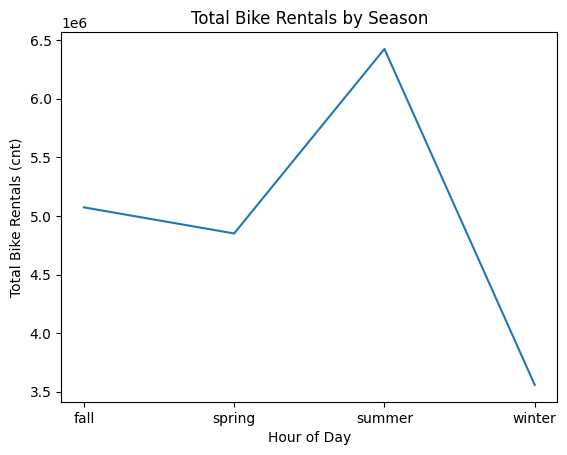

In [31]:
hour_sum = df.groupby('season')['cnt'].sum()

plt.plot(hour_sum.index, hour_sum.values)
plt.xlabel('Hour of Day')
plt.ylabel('Total Bike Rentals (cnt)')
plt.title('Total Bike Rentals by Season')


plt.show()


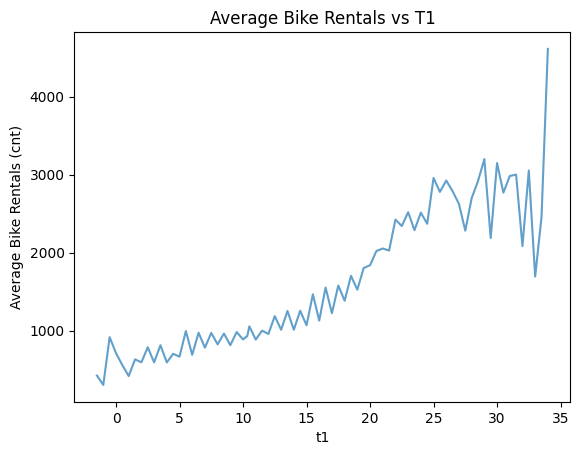

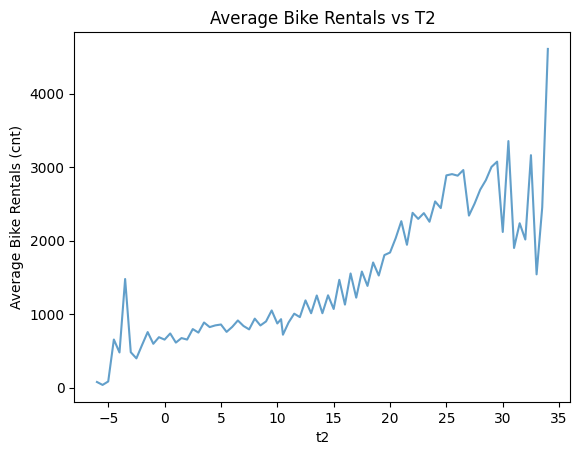

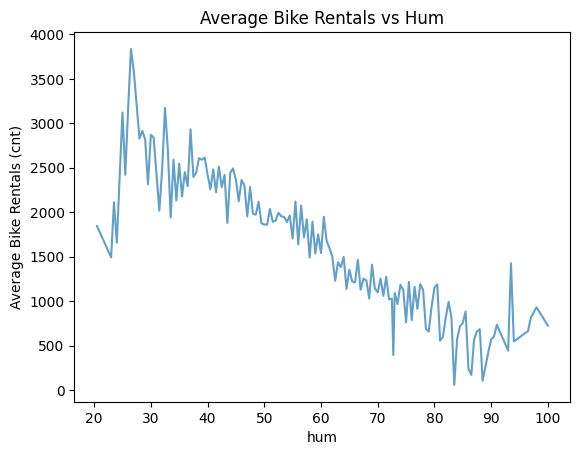

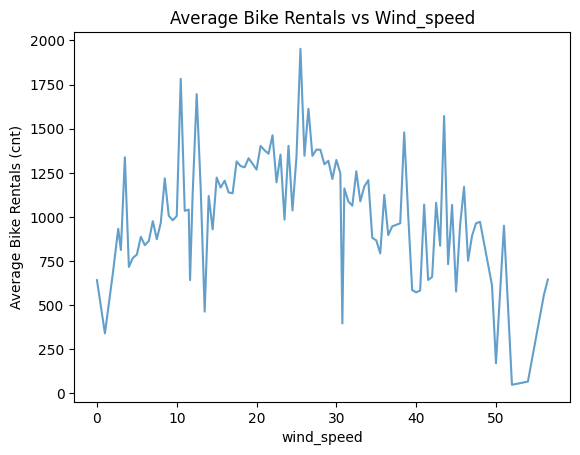

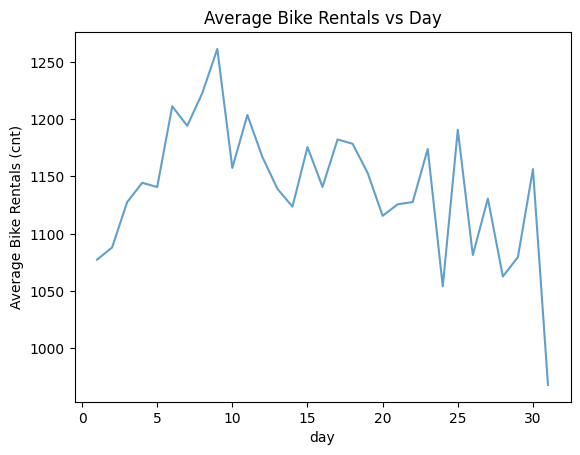

In [32]:
def plot_bike_rentals_by_numerical(df, feature):
    feature_group = df.groupby(feature)['cnt'].mean()
    
    plt.plot(feature_group.index, feature_group.values, alpha=0.7)
    plt.xlabel(feature)
    plt.ylabel('Average Bike Rentals (cnt)')
    plt.title(f'Average Bike Rentals vs {feature.capitalize()}')
    plt.show()


for feature in numerical:
    plot_bike_rentals_by_numerical(df, feature)


Splitting the datset

In [33]:
from sklearn.model_selection import train_test_split   

In [34]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
len(df_full_train), len(df_test)

(13931, 3483)

In [35]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train), len(df_val)

(10448, 3483)

In [36]:
df_train = df_train.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)

In [37]:
df_train.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day,month,year,weekday
0,4092,24.0,24.0,44.0,13.0,mostly_clear,non-holiday,weekday,summer,18,25,6,2015,Thursday
1,96,8.5,5.5,84.5,17.0,light_rain,non-holiday,weekend,spring,4,9,4,2016,Saturday
2,44,9.0,7.0,87.0,13.0,few_clouds,non-holiday,weekday,fall,4,8,10,2015,Thursday
3,4050,16.0,16.0,55.0,18.0,mostly_clear,non-holiday,weekday,summer,18,15,6,2015,Monday
4,338,13.0,13.0,94.0,10.0,cloudy,non-holiday,weekday,winter,1,9,12,2016,Friday


In [38]:
y_train = df_train.cnt.values
y_test = df_test.cnt.values
y_val = df_val.cnt.values

In [39]:
print(f"Target Variable Range: {y_train.min()} to {y_train.max()}")

Target Variable Range: 10 to 7208


In [40]:
del df_train['cnt']
del df_test['cnt']
del df_val['cnt']

### Simple Regression

In [41]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [43]:
dv = DictVectorizer(sparse=False)

In [44]:
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

In [45]:
X_train.shape

(10448, 30)

In [46]:
dv.get_feature_names_out()

array(['day', 'hour', 'hum', 'is_holiday=holiday',
       'is_holiday=non-holiday', 'is_weekend=weekday',
       'is_weekend=weekend', 'month', 'season=fall', 'season=spring',
       'season=summer', 'season=winter', 't1', 't2',
       'weather_code=broken_clouds', 'weather_code=cloudy',
       'weather_code=few_clouds', 'weather_code=light_rain',
       'weather_code=mostly_clear', 'weather_code=snowfall',
       'weather_code=thunderstorm', 'weekday=Friday', 'weekday=Monday',
       'weekday=Saturday', 'weekday=Sunday', 'weekday=Thursday',
       'weekday=Tuesday', 'weekday=Wednesday', 'wind_speed', 'year'],
      dtype=object)

In [47]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = model.predict(X_val)

In [49]:
mse = mean_squared_error(y_val, y_pred) 
rmse = np.sqrt(mse)


print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 888.9098714607672


### Decision Tree

In [50]:
from sklearn.tree import DecisionTreeRegressor

In [51]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeRegressor(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    rmse = mse ** 0.5  
    
    print('%4s -> RMSE: %.3f' % (depth, rmse))


   1 -> RMSE: 905.262
   2 -> RMSE: 815.687
   3 -> RMSE: 766.512
   4 -> RMSE: 713.839
   5 -> RMSE: 635.150
   6 -> RMSE: 497.748
  10 -> RMSE: 326.901
  15 -> RMSE: 289.022
  20 -> RMSE: 297.912
None -> RMSE: 305.826


In [52]:
#parameter tuning
scores = []

for depth in [None, 20, 15, 10, 6]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict(X_val)
        mse = mean_squared_error(y_val, y_pred)
        rmse = mse ** 0.5
        
        scores.append((depth, s, rmse))

In [53]:
columns = ['max_depth', 'min_samples_leaf', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['rmse'])
df_scores_pivot.round(3)

rmse                                    
max_depth             NaN     6.0      10.0     15.0     20.0
min_samples_leaf                                             
1                 307.429  497.748  326.704  307.239  307.754
5                 275.067  497.593  312.500  275.549  275.004
10                317.640  497.253  341.273  318.397  317.635
15                329.644  497.270  346.046  329.692  329.644
20                339.391  497.464  353.352  339.483  339.391
100               442.391  515.681  444.635  442.677  442.391
200               510.830  561.214  510.971  510.830  510.830
500               615.395  617.554  615.395  615.395  615.395

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

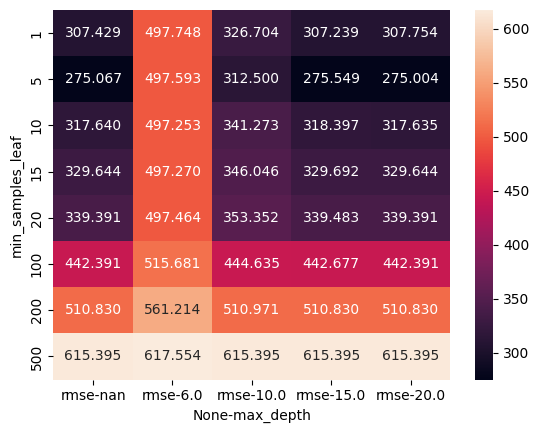

In [54]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [55]:
dt = DecisionTreeRegressor(max_depth=None, min_samples_leaf=5)
dt.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_leaf=5)

In [56]:
y_pred = dt.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = mse ** 0.5

print(f"Final RMSE: {rmse}")

Final RMSE: 275.2780807219745


### Random Forest

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    rmse = mse ** 0.5
    
    scores.append((n, rmse))

In [59]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])
df_scores

,n_estimators,rmse
0,10,231.089479
1,20,225.690412
2,30,223.423091
3,40,220.719413
4,50,218.795132
5,60,218.574941
6,70,218.106179
7,80,217.694367
8,90,217.176282
9,100,216.550817


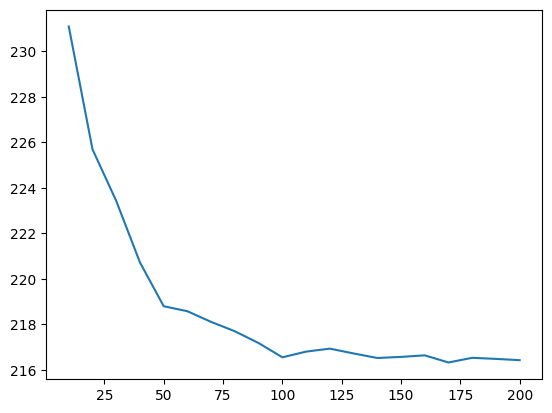

In [60]:
plt.plot(df_scores.n_estimators, df_scores.rmse)

In [61]:
#tuning max_depth
scores = []

for d in [5, 10, 15, 20, 25]:
    for n in range(10, 301, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                   max_depth=d,
                                   random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        mse = mean_squared_error(y_val, y_pred)
        rmse = mse ** 0.5

        scores.append((d, n, rmse))

In [62]:
columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()


,max_depth,n_estimators,rmse
0,5,10,582.581089
1,5,20,595.582617
2,5,30,596.057636
3,5,40,598.687596
4,5,50,595.068626


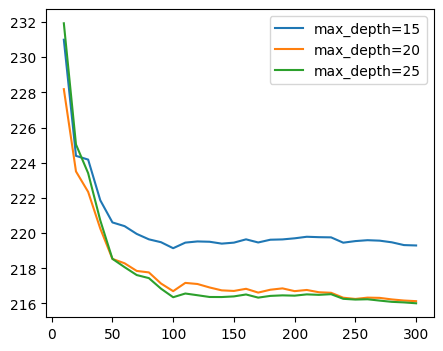

In [63]:
plt.figure(figsize=(5, 4))
for d in [15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             label='max_depth=%d' % d)

plt.legend()

In [64]:
#checking for depths 20, 30, None
scores = []

for d in [20, 30, None]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                   max_depth=d,
                                   random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        mse = mean_squared_error(y_val, y_pred)
        rmse = mse ** 0.5

        scores.append((d, n, rmse))

In [65]:
columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,max_depth,n_estimators,rmse
0,20.0,10,228.185461
1,20.0,20,223.507198
2,20.0,30,222.347592
3,20.0,40,220.260233
4,20.0,50,218.534803
5,20.0,60,218.285584
6,20.0,70,217.850720
7,20.0,80,217.766791
8,20.0,90,217.134970
9,20.0,100,216.700867


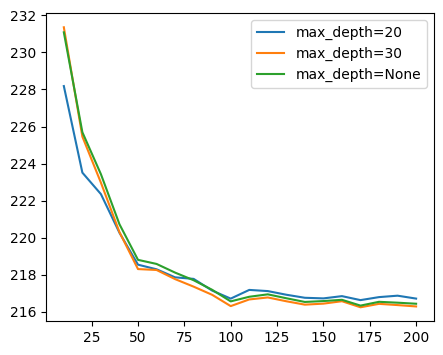

In [66]:
plt.figure(figsize=(5, 4))
for d in [20, 30, None]:
    if d is None:

        df_subset = df_scores[pd.isnull(df_scores['max_depth'])]
        label = 'max_depth=None'
    else:
        df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             label=f'max_depth={d if d is not None else "None"}')

plt.legend()
plt.show()

In [67]:
max_depth = 30

In [68]:
#tuning min_sample_leaf
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n,max_depth=max_depth, min_samples_leaf=s, random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        mse = mean_squared_error(y_val, y_pred)
        rmse = mse ** 0.5

        scores.append((s, n, rmse))

In [69]:
columns = ['min_samples_leaf', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,min_samples_leaf,n_estimators,rmse
0,1,10,231.361783
1,1,20,225.453889
2,1,30,222.965699
3,1,40,220.292298
4,1,50,218.296634
...,...,...,...
95,50,160,379.968125
96,50,170,379.478891
97,50,180,379.677205
98,50,190,380.028566


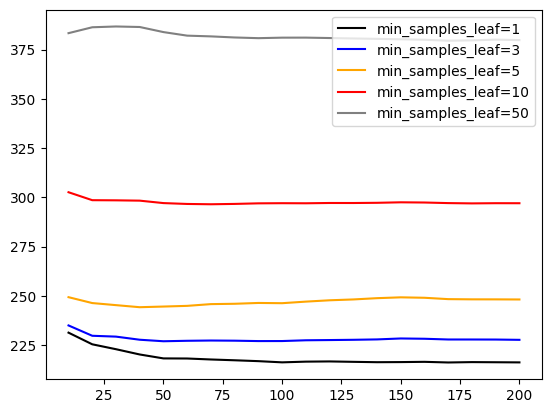

In [70]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

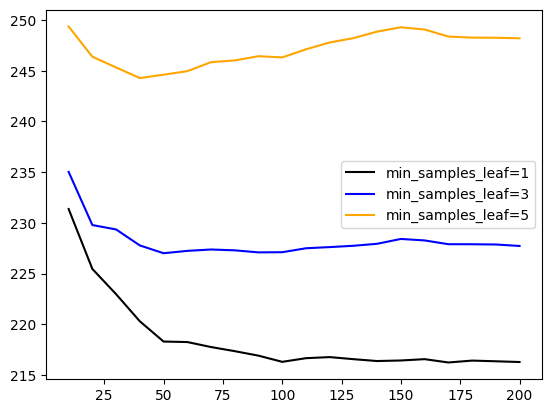

In [71]:
#plotting graphs of 1, 3, 5 for better visibility
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [72]:
min_samples_leaf = 1

In [73]:
#training model with the best chosen parameters
rf = RandomForestRegressor(n_estimators=100,  
                            max_depth=30,   
                            min_samples_leaf=min_samples_leaf,
                            random_state=1,
                            n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, n_jobs=-1, random_state=1)

In [74]:
y_pred = rf.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = mse ** 0.5

print(f"Final RMSE: {rmse}")

Final RMSE: 216.29611349845533


### Gradient Boosting

In [75]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error

In [76]:
#tuning eta
etas = [0.01, 0.05, 0.1, 0.2, 0.3]  
n_estimators_range = range(10, 201, 10)  

results = []


for eta in etas:
    for n in n_estimators_range:
        params = {
            "eta": eta,
            "n_estimators": n,
            "max_depth": 10,
            "min_child_weight": 1,
            "objective": "reg:squarederror",
            "eval_metric": "rmse",  
            "random_state": 1,
        }
        xgb = XGBRegressor(**params)
        xgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

        # Extract RMSE from evals_result
        rmse = xgb.evals_result()["validation_0"]["rmse"][-1]
        results.append((eta, n, rmse))

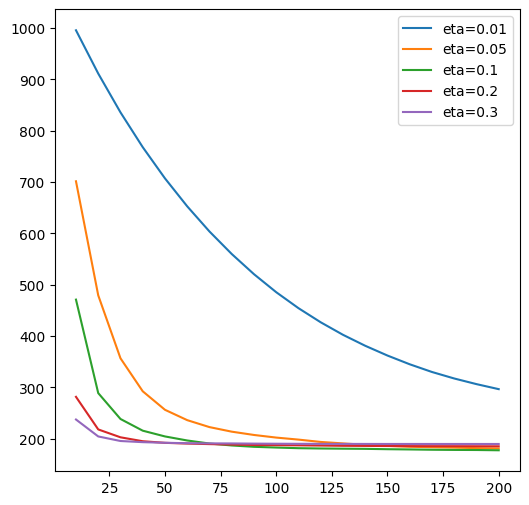

In [77]:
columns = ["eta", "n_estimators","rmse"]
df_results = pd.DataFrame(results, columns=columns)


plt.figure(figsize=(6, 6))
for eta in etas:
    df_subset = df_results[df_results.eta == eta]
    plt.plot(df_subset.n_estimators, df_subset.rmse, label=f'eta={eta}')
    
plt.legend()

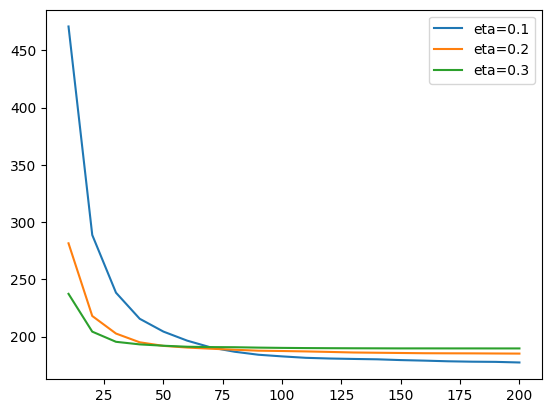

In [78]:
#plotting only 0.1, 0.2, 0.2
for eta in [0.1, 0.2, 0.3] :
    df_subset = df_results[df_results.eta == eta]
    plt.plot(df_subset.n_estimators, df_subset.rmse, label=f'eta={eta}')
    
plt.legend()

In [79]:
eta = 0.1
n_estimators_range = range(10, 201, 10)  
max_depths = [3, 6, 10, 15]  
results = []

# Tuning max_depth
for max_depth in max_depths:
    for n in n_estimators_range:
            params = {
                "eta": eta,
                "n_estimators": n,
                "max_depth": max_depth,
                "min_child_weight": 1,
                "objective": "reg:squarederror",
                "eval_metric": "rmse",  
                "random_state": 1,
            }
            xgb = XGBRegressor(**params)
            xgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

            rmse = xgb.evals_result()["validation_0"]["rmse"][-1]
            results.append((max_depth, n, rmse))

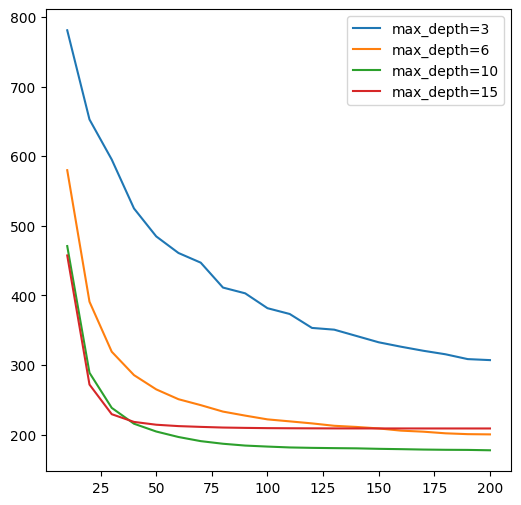

In [80]:
columns = ["max_depth", "n_estimators", "rmse"]
df_results = pd.DataFrame(results, columns=columns)


plt.figure(figsize=(6, 6))
for max_depth in max_depths:
    subset = df_results[df_results.max_depth == max_depth]
    plt.plot(subset.n_estimators, subset.rmse, label=f"max_depth={max_depth}")

plt.legend()

In [81]:
max_depth = 10
n_estimators_range = range(10, 201, 10)  
min_child_weights = [1, 3, 5, 10]  
results = []

#tuning min_child_weight
for min_child_weight in min_child_weights:
    for n in n_estimators_range:
        params = {
            "eta": eta,
            "n_estimators": n,
            "max_depth": max_depth,
            "min_child_weight": min_child_weight,
            "objective": "reg:squarederror",
            "eval_metric": "rmse", 
            "random_state": 1,
        }
        xgb = XGBRegressor(**params)
        xgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

        rmse = xgb.evals_result()["validation_0"]["rmse"][-1]
        results.append((min_child_weight, n, rmse))

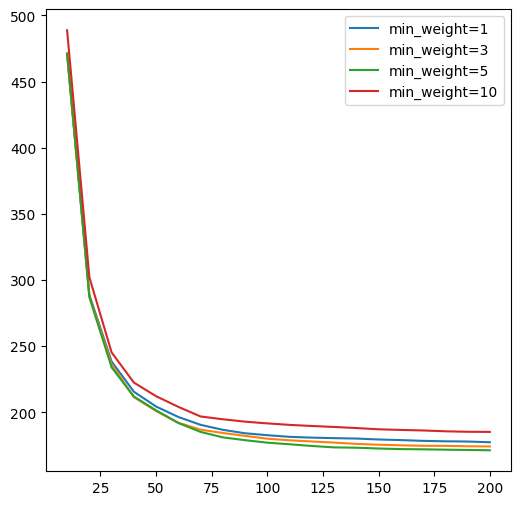

In [82]:
columns = ["min_child_weight", "n_estimators", "rmse"]
df_results = pd.DataFrame(results, columns=columns)


plt.figure(figsize=(6, 6))
for min_weight in min_child_weights:
    subset = df_results[df_results.min_child_weight == min_weight]
    plt.plot(subset.n_estimators, subset.rmse, label=f"min_weight={min_weight}")

plt.legend()

In [83]:
#model with best parameters

params = {
    "eta": 0.1,
    "n_estimators": 125,
    "max_depth": 10,
    "min_child_weight": 5,
    "objective": "reg:squarederror",
    "eval_metric": "rmse", 
    "random_state": 1,
}

xgb = XGBRegressor(**params)

xgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

y_pred = xgb.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = mse ** 0.5

print(f"Final RMSE: {rmse}")


Final RMSE: 173.7848998223091


We see that the XGBoost model has the best score. We’ll use this to train the final model.

In [84]:
df_full_train

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day,month,year,weekday
223,3960,9.0,6.5,71.0,16.0,few_clouds,non-holiday,weekday,winter,8,13,1,2015,Tuesday
4740,58,16.0,16.0,77.0,18.5,mostly_clear,non-holiday,weekday,summer,3,21,7,2015,Tuesday
15957,629,9.0,7.5,76.0,11.0,mostly_clear,non-holiday,weekday,fall,6,4,11,2016,Friday
5768,342,14.0,14.0,88.0,6.5,mostly_clear,non-holiday,weekday,fall,23,1,9,2015,Tuesday
3099,1150,16.5,16.5,39.5,7.5,mostly_clear,non-holiday,weekday,spring,11,13,5,2015,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,1864,6.5,2.5,73.5,26.0,light_rain,non-holiday,weekday,spring,7,7,4,2016,Thursday
17289,650,5.5,4.0,84.0,6.5,mostly_clear,non-holiday,weekday,winter,19,29,12,2016,Thursday
5192,967,19.0,19.0,64.0,8.0,mostly_clear,non-holiday,weekend,summer,23,8,8,2015,Saturday
12172,388,12.5,12.5,85.0,9.0,mostly_clear,non-holiday,weekend,spring,1,28,5,2016,Saturday


In [85]:
#df_full_train has train and val data together
y_full_train = df_full_train['cnt']

In [86]:
del df_full_train['cnt']

In [87]:
#transforming full train and test dat to feature matrices

dicts_full_train = df_full_train.to_dict(orient='records')
 
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)
 
dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [88]:
feature_names = list(dv.get_feature_names_out())
feature_names

['day',
 'hour',
 'hum',
 'is_holiday=holiday',
 'is_holiday=non-holiday',
 'is_weekend=weekday',
 'is_weekend=weekend',
 'month',
 'season=fall',
 'season=spring',
 'season=summer',
 'season=winter',
 't1',
 't2',
 'weather_code=broken_clouds',
 'weather_code=cloudy',
 'weather_code=few_clouds',
 'weather_code=light_rain',
 'weather_code=mostly_clear',
 'weather_code=snowfall',
 'weather_code=thunderstorm',
 'weekday=Friday',
 'weekday=Monday',
 'weekday=Saturday',
 'weekday=Sunday',
 'weekday=Thursday',
 'weekday=Tuesday',
 'weekday=Wednesday',
 'wind_speed',
 'year']

In [89]:
# Make predictions on the test data
y_pred_test = xgb.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mse_test ** 0.5

print(f"Final RMSE on Test Data: {rmse_test}")

Final RMSE on Test Data: 175.1402730224405
